# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

### Get the data

In [ ]:
import numpy as np
import zipfile
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy


In [ ]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-29 01:33:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.9MB/s    in 5.5s    

2023-03-29 01:33:23 (19.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


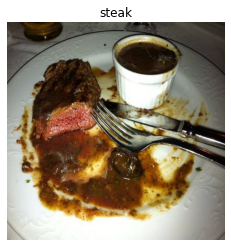

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# View the img (actually just a big array/tensor)
img

array([[[ 56,  47,  42],
        [ 54,  45,  40],
        [ 56,  47,  42],
        ...,
        [ 41,  32,  27],
        [ 42,  33,  28],
        [ 47,  38,  33]],

       [[ 53,  44,  39],
        [ 53,  44,  39],
        [ 54,  45,  40],
        ...,
        [ 42,  33,  28],
        [ 43,  34,  29],
        [ 45,  36,  31]],

       [[ 52,  43,  38],
        [ 53,  44,  39],
        [ 54,  45,  40],
        ...,
        [ 43,  34,  29],
        [ 44,  35,  30],
        [ 42,  33,  28]],

       ...,

       [[168, 164, 155],
        [163, 159, 150],
        [167, 163, 154],
        ...,
        [101,  94,  88],
        [ 98,  91,  85],
        [ 97,  90,  84]],

       [[164, 160, 151],
        [166, 162, 153],
        [158, 154, 145],
        ...,
        [100,  93,  87],
        [ 99,  92,  86],
        [100,  93,  87]],

       [[157, 153, 144],
        [166, 162, 153],
        [155, 151, 142],
        ...,
        [104,  97,  91],
        [106,  99,  93],
        [108, 101,  95]]

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

### An end-to-end example

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data)

47

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(filters=10,kernel_size=3,activation='relu', input_shape=(224,224,3)))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D(pool_size=2,padding='valid'))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D(pool_size=2,padding='valid'))
model_1.add(Flatten())
model_1.add(Dense(1, activation="sigmoid")) # binary activation output)

# compile the CNN
model_1.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 233ms/step - loss: 0.5548 - accuracy: 0.7167 - val_loss: 0.4037 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4331 - accuracy: 0.7980 - val_loss: 0.3672 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4062 - accuracy: 0.8280 - val_loss: 0.3500 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3667 - accuracy: 0.8427 - val_loss: 0.3105 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3255 - accuracy: 0.8653 - val_loss: 0.2988 - val_accuracy: 0.8840


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Using the same model as before

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = Sequential()
model_2.add(Flatten(input_shape=(224, 224, 3))) # dense layers expect a 1-dimensional vector as input
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 208ms/step - loss: 0.7491 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = Sequential()
model_3.add(Flatten(input_shape=(224, 224, 3))) # dense layers expect a 1-dimensional vector as input
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 204ms/step - loss: 1.9477 - accuracy: 0.6413 - val_loss: 0.9645 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 1.0931 - accuracy: 0.6827 - val_loss: 0.6699 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5755 - accuracy: 0.7500 - val_loss: 0.4557 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6543 - accuracy: 0.7273 - val_loss: 0.5331 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6595 - accuracy: 0.7360 - val_loss: 0.5525 - val_accuracy: 0.7760


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

### Import and become one with the data

In [ ]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (512, 382, 3)
Image shape: (307, 512, 3)


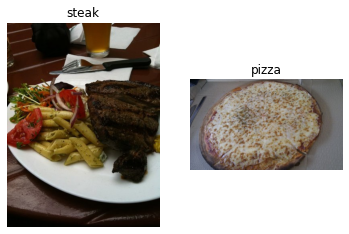

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data (prepare it for a model)

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_4 = Sequential()
model_4.add(Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)))
model_4.add(Conv2D(10, 3, activation='relu'))
model_4.add(Conv2D(10, 3, activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 219ms/step - loss: 1.1980 - accuracy: 0.6280 - val_loss: 0.4639 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4309 - accuracy: 0.8100 - val_loss: 0.3871 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3233 - accuracy: 0.8633 - val_loss: 0.3757 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.2300 - accuracy: 0.9160 - val_loss: 0.3797 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.1199 - accuracy: 0.9700 - val_loss: 0.4238 - val_accuracy: 0.8120


### Evaluate the model

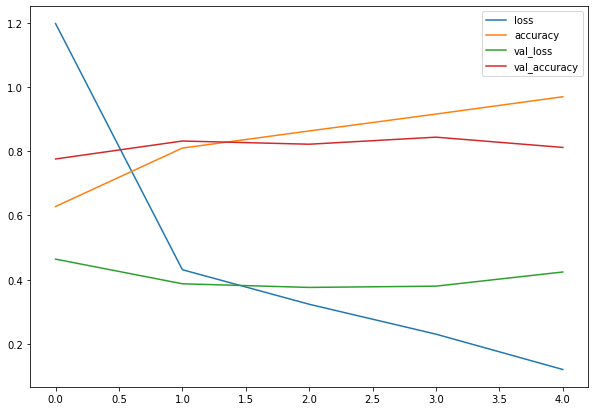

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

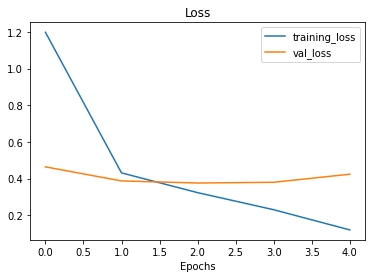

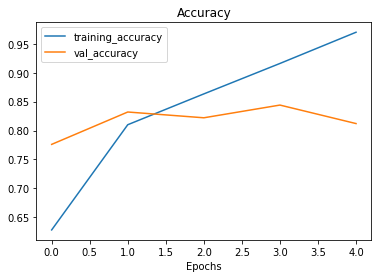

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Adjust the model parameters

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_5 = Sequential()
model_5.add(Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)))
model_5.add(MaxPool2D(pool_size=2))
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Flatten())
model_5.add(Dense(1, activation='sigmoid'))

In [38]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 236ms/step - loss: 0.6060 - accuracy: 0.6860 - val_loss: 0.4642 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4600 - accuracy: 0.7933 - val_loss: 0.3984 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4380 - accuracy: 0.7947 - val_loss: 0.3591 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3995 - accuracy: 0.8213 - val_loss: 0.3393 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3572 - accuracy: 0.8533 - val_loss: 0.3307 - val_accuracy: 0.8760


In [40]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

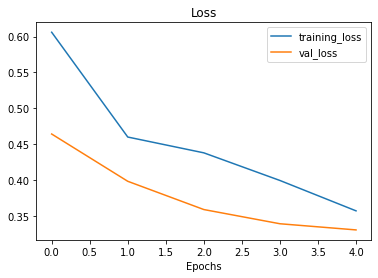

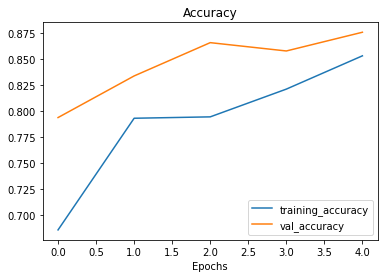

In [41]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [43]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')
     

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [44]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

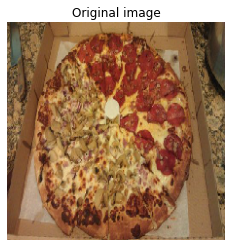

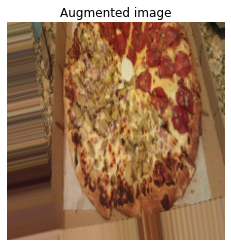

In [47]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [48]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_6 = Sequential()
model_6.add(Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)))
model_6.add(MaxPool2D(pool_size=2))
model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(1, activation='sigmoid'))

In [49]:
# Compile model (same as model_5)
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [50]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 497ms/step - loss: 0.7005 - accuracy: 0.4213 - val_loss: 0.6863 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 29s 619ms/step - loss: 0.6999 - accuracy: 0.5393 - val_loss: 0.6858 - val_accuracy: 0.5840
Epoch 3/5
47/47 [==============================] - 27s 573ms/step - loss: 0.6882 - accuracy: 0.5407 - val_loss: 0.6537 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 28s 596ms/step - loss: 0.6495 - accuracy: 0.7220 - val_loss: 0.6114 - val_accuracy: 0.5960
Epoch 5/5
47/47 [==============================] - 33s 709ms/step - loss: 0.6155 - accuracy: 0.6587 - val_loss: 0.5969 - val_accuracy: 0.6280


In [51]:
# Check out the model architecture
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

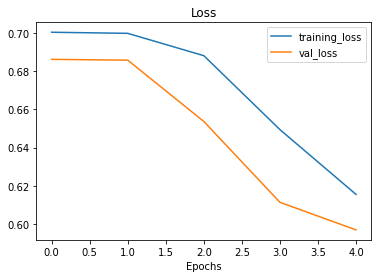

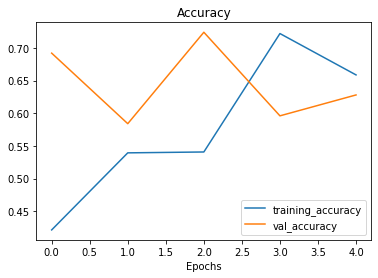

In [52]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [53]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)
 

Found 1500 images belonging to 2 classes.


In [54]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_7 = Sequential()
model_7.add(Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)))
model_7.add(MaxPool2D(pool_size=2))
model_7.add(Conv2D(10, 3, activation='relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10, 3, activation='relu'))
model_7.add(MaxPool2D())
model_7.add(Flatten())
model_7.add(Dense(1, activation='sigmoid'))

# Compile model (same as model_5)
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 525ms/step - loss: 0.6450 - accuracy: 0.6360 - val_loss: 0.5633 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5745 - accuracy: 0.7073 - val_loss: 0.5631 - val_accuracy: 0.6520
Epoch 3/5
47/47 [==============================] - 26s 551ms/step - loss: 0.5193 - accuracy: 0.7467 - val_loss: 0.4346 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 33s 701ms/step - loss: 0.4803 - accuracy: 0.7800 - val_loss: 0.3572 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 29s 608ms/step - loss: 0.5009 - accuracy: 0.7680 - val_loss: 0.3833 - val_accuracy: 0.8600


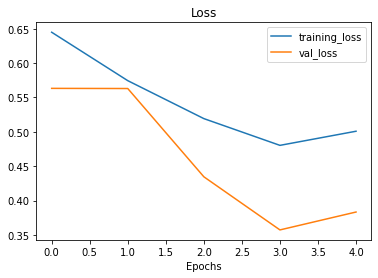

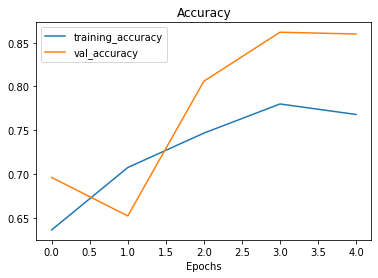

In [55]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [82]:
# Create a model to replicate the TensorFlow Playground model
model_8 = Sequential()
model_8.add(Conv2D(filters=10, 
         kernel_size=3,
         activation='relu', 
         input_shape=(224, 224, 3)))
model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(MaxPool2D(pool_size=2))
model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Flatten())
model_8.add(Dense(1, activation='sigmoid'))

# Compile model (same as model_7)
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 26s 514ms/step - loss: 0.6423 - accuracy: 0.6327 - val_loss: 0.4739 - val_accuracy: 0.7680
Epoch 2/10
47/47 [==============================] - 25s 523ms/step - loss: 0.5537 - accuracy: 0.7160 - val_loss: 0.4278 - val_accuracy: 0.8080
Epoch 3/10
47/47 [==============================] - 25s 535ms/step - loss: 0.4986 - accuracy: 0.7520 - val_loss: 0.4188 - val_accuracy: 0.8060
Epoch 4/10
47/47 [==============================] - 24s 508ms/step - loss: 0.5042 - accuracy: 0.7600 - val_loss: 0.3644 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 25s 530ms/step - loss: 0.4609 - accuracy: 0.7873 - val_loss: 0.3412 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 24s 518ms/step - loss: 0.4791 - accuracy: 0.7660 - val_loss: 0.3689 - val_accuracy: 0.8400
Epoch 7/10
47/47 [==============================] - 25s 530ms/step - loss: 0.4706 - accuracy: 0.7973 - val_loss: 0.3535 - val_accuracy: 0.8420

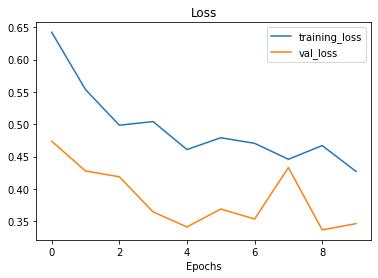

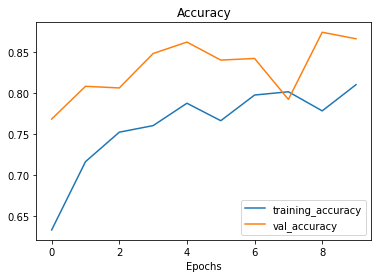

In [83]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

### Making a prediction with our trained model

In [84]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-03-29 03:31:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2023-03-29 03:31:51 (250 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



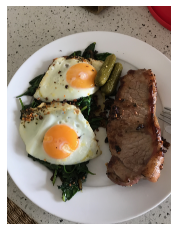

In [59]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [60]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [61]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [62]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [64]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 258ms/step


array([[0.87682396]], dtype=float32)

In [65]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [71]:
tf.round(pred)[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [72]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [73]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 73ms/step


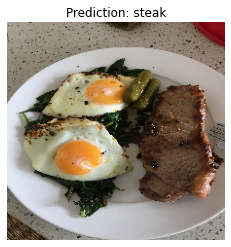

In [85]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-03-29 03:55:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-03-29 03:55:27 (258 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


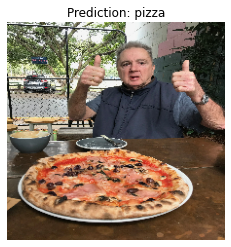

In [86]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [87]:
!wget https://i0.wp.com/thesanantoniothings.com/wp-content/uploads/2022/11/Pizza-In-San-Antonio-09.jpg?fit=1685%2C2048&ssl=1

--2023-03-29 03:55:37--  https://i0.wp.com/thesanantoniothings.com/wp-content/uploads/2022/11/Pizza-In-San-Antonio-09.jpg?fit=1685%2C2048
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525383 (513K) [image/jpeg]
Saving to: ‘Pizza-In-San-Antonio-09.jpg?fit=1685,2048.1’

Pizza-In-San-Antoni 100%[===================>] 513.07K  --.-KB/s    in 0.009s  

2023-03-29 03:55:37 (57.2 MB/s) - ‘Pizza-In-San-Antonio-09.jpg?fit=1685,2048.1’ saved [525383/525383]



1/1 [==============================] - 0s 22ms/step


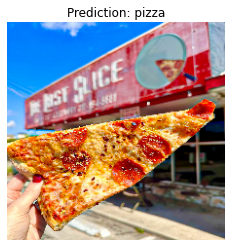

In [88]:
pred_and_plot(model_8, "Pizza-In-San-Antonio-09.jpg?fit=1685,2048", class_names)

## Multi-class Classification

### Import and become one with the data

In [89]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-29 03:59:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  19.0MB/s    in 27s     

2023-03-29 03:59:48 (18.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [90]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [91]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [92]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


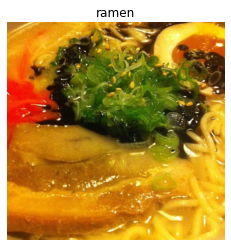

In [94]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### Preprocess the data (prepare it for a model)

In [95]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model (start with a baseline)

In [96]:
# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=Adam(),
                metrics=["accuracy"])

### Fit a model

In [97]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 252ms/step - loss: 2.1750 - accuracy: 0.2040 - val_loss: 2.0096 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 54s 232ms/step - loss: 1.9224 - accuracy: 0.3401 - val_loss: 1.9031 - val_accuracy: 0.3420
Epoch 3/5
235/235 [==============================] - 62s 263ms/step - loss: 1.6705 - accuracy: 0.4416 - val_loss: 1.9976 - val_accuracy: 0.3284
Epoch 4/5
235/235 [==============================] - 51s 218ms/step - loss: 1.2184 - accuracy: 0.6024 - val_loss: 2.1811 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 61s 260ms/step - loss: 0.6591 - accuracy: 0.7919 - val_loss: 2.9949 - val_accuracy: 0.2712


### Evaluate the model

In [98]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.9949 - accuracy: 0.2712


[2.994899034500122, 0.2712000012397766]

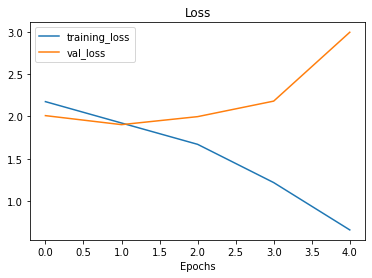

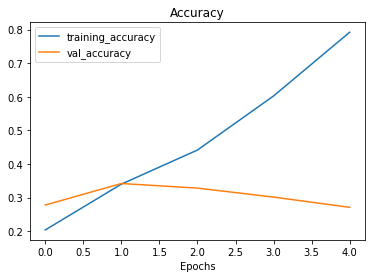

In [99]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

### Adjust the model parameters

In [100]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 211ms/step - loss: 2.0326 - accuracy: 0.2768 - val_loss: 1.8841 - val_accuracy: 0.3436
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.6748 - accuracy: 0.4349 - val_loss: 1.8318 - val_accuracy: 0.3664
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.2429 - accuracy: 0.6004 - val_loss: 1.9510 - val_accuracy: 0.3604
Epoch 4/5
235/235 [==============================] - 48s 204ms/step - loss: 0.7149 - accuracy: 0.7921 - val_loss: 2.3240 - val_accuracy: 0.3272
Epoch 5/5
235/235 [==============================] - 48s 203ms/step - loss: 0.3471 - accuracy: 0.9156 - val_loss: 2.5656 - val_accuracy: 0.3352


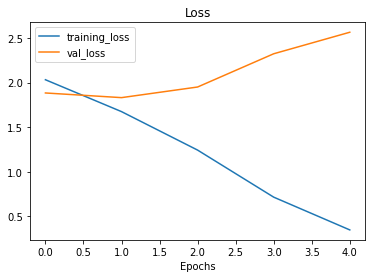

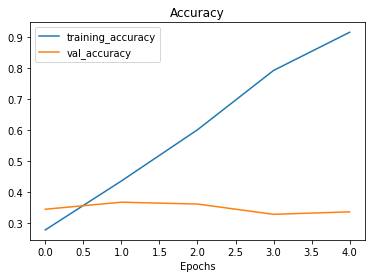

In [102]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [101]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [103]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 521ms/step - loss: 2.1700 - accuracy: 0.2297 - val_loss: 1.9003 - val_accuracy: 0.3348
Epoch 2/5
235/235 [==============================] - 122s 520ms/step - loss: 2.0018 - accuracy: 0.3005 - val_loss: 1.8526 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 119s 508ms/step - loss: 1.9683 - accuracy: 0.3159 - val_loss: 1.8614 - val_accuracy: 0.3600
Epoch 4/5
235/235 [==============================] - 133s 567ms/step - loss: 1.9294 - accuracy: 0.3267 - val_loss: 1.7587 - val_accuracy: 0.4016
Epoch 5/5
235/235 [==============================] - 123s 523ms/step - loss: 1.8979 - accuracy: 0.3464 - val_loss: 1.7626 - val_accuracy: 0.4000


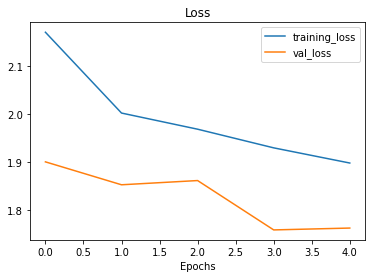

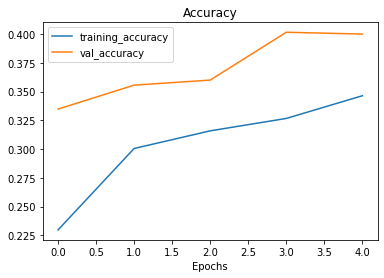

In [104]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

### Making a prediction with our trained model

In [105]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [106]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 81ms/step


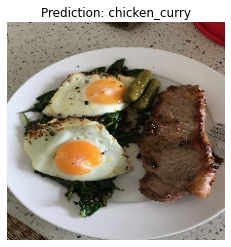

In [107]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

1/1 [==============================] - 0s 20ms/step


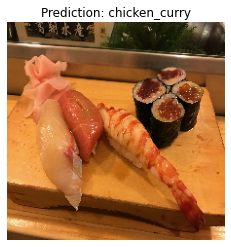

In [108]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

### Saving and loading our model

In [109]:
# Save a model
model_11.save("saved_trained_model")

In [110]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 1.7626 - accuracy: 0.4000


[1.7625560760498047, 0.4000000059604645]

In [111]:
loaded_model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_15 (Dense)            (None, 10)              

In [112]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 1.7626 - accuracy: 0.4000


[1.7625558376312256, 0.4000000059604645]